# HW03 Machine Learning - 🚢🏊🏻‍♀️Titanic 

## Table Of Content

 1. [Import Data & Python Packages](#data-header)

 2. [Data Visualization](#viz-header)

 3. [Data Cleansing](#clean-header)

 4. [Machine Learning Algorithms](#ml-header)<br>
 4.1. PCA<br>
 4.2 Fit Models

 5. [Discussion and Conclusions](#conc-header)<br><br>
 

<hr>

# 1. Import Data & Python Packages <a class="anchor" id="data-header"></a>


In [1]:
##Import Libraries


#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import tensorflow as tf #collection of machine learning algorithms
print("tensorflow version: {}". format(tf.__version__))

import keras  #collection of machine learning algorithms
print("keras version: {}". format(keras.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["dir", "input",],shell=True).decode("utf8"))

# Any results you write to the current directory are saved as output.

#Common Model Algorithms
from sklearn import svm, tree,cluster, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process ,decomposition

from xgboost import XGBClassifier
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense ,Dropout    # create layers 
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold , cross_val_score

#Visualization
import matplotlib.font_manager as font_manager
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
# sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#set seed
seed = 7

Python version: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.14.0
scikit-learn version: 0.23.1
tensorflow version: 2.2.0
keras version: 2.4.2
-------------------------
 Volume in drive C has no label.
 Volume Serial Number is 9E12-1BF2

 Directory of C:\Users\Odin\PycharmProjects\Machine-Learning-HWs\HW03\input

06/14/2020  12:22 PM    <DIR>          .
06/14/2020  12:22 PM    <DIR>          ..
12/11/2019  03:17 AM             3,258 gender_submission.csv
12/11/2019  03:17 AM            28,629 test.csv
12/11/2019  03:17 AM            61,194 train.csv
               3 File(s)         93,081 bytes
               2 Dir(s)  14,918,307,840 bytes free



Using TensorFlow backend.


In [2]:
#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv('input/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('input/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info())
#data_raw.head()
#data_raw.tail() 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S


<hr>

# 2. Data Visualization <a class="anchor" id="viz-header"></a>

### 2.1 Exploration of Age 


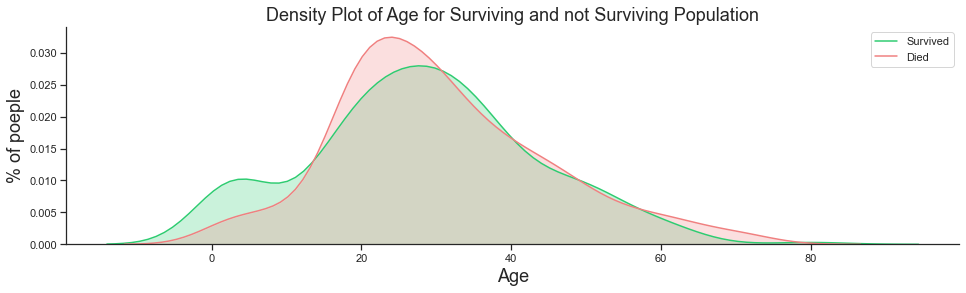

In [3]:
#Add conclutions from this graph and shit
font_prop = font_manager.FontProperties( size=18)
sns.set(style="ticks")

plt.figure(figsize=(16,4))
sns.kdeplot(data_raw["Age"][data_raw.Survived == 1], color="#2ecc71", shade=True)
sns.kdeplot(data_raw["Age"][data_raw.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.ylabel('% of poeple', fontproperties=font_prop)
plt.xlabel('Age', fontproperties=font_prop)
plt.title('Density Plot of Age for Surviving and not Surviving Population', fontproperties=font_prop)
sns.despine()
plt.show()

### 2.2 Exploration of Fare 


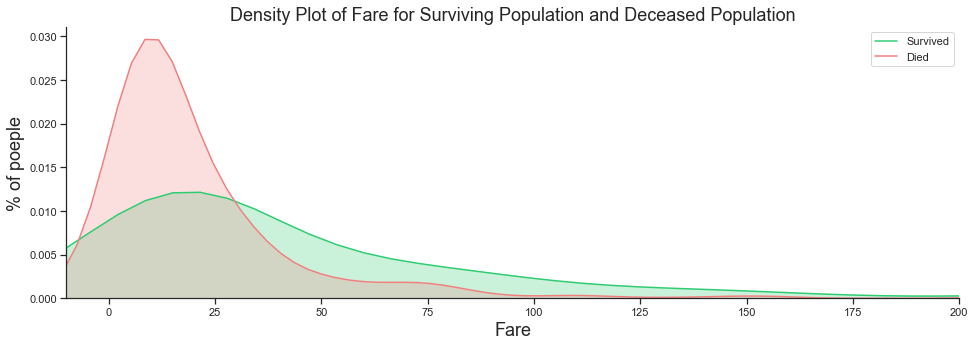

In [4]:
#again add conclutions
plt.figure(figsize=(16,5))
sns.kdeplot(data_raw["Fare"][data_raw.Survived == 1], color="#2ecc71", shade=True)
sns.kdeplot(data_raw["Fare"][data_raw.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.ylabel('% of poeple', fontproperties=font_prop)
plt.xlabel('Fare', fontproperties=font_prop)
plt.title('Density Plot of Fare for Surviving Population and Deceased Population', fontproperties=font_prop)
plt.xlim(-10,200)
sns.despine()
plt.show()

### 2.3 Looking for Correlation


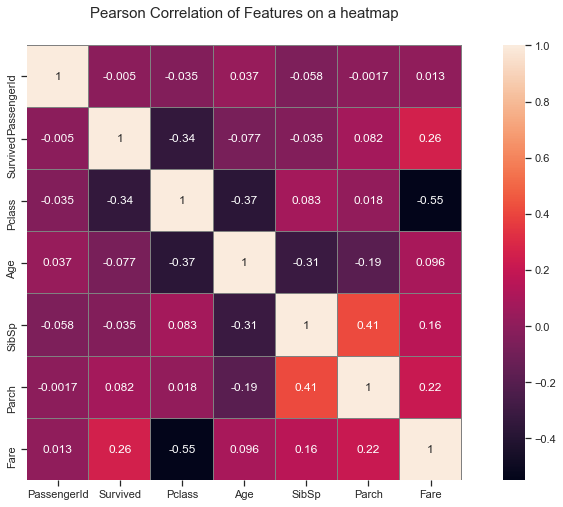

In [5]:
# Look at the correlation between the data
plt.figure(figsize=(15,8))
plt.title('Pearson Correlation of Features on a heatmap', y=1.05, size=15)
sns.heatmap(data_raw.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='grey', annot=True)

<hr>

# 3. Data Cleansing <a class="anchor" id="clean-header"></a>

Before we start cleansing the preparing the final data, lets have a look at the faetures:

- PassangerId - a unique numeric values between 1 and 891 that describes the passanger's id.
- Survived - boolean value which described weather the passanger survived = 1 or did not = 0.
- Pclass - describes the passenger's class it can be one of three: 1 = upper, 2 = middle, 3 = lower.
- Name - the name of the passanger (string).
- Sex - the sex of the passanger can be one of two male or female.
- Age - the passangers age in years (number).
- SibSp - number of spouses and siblings the passanger has on the Titanic (number).
- Parch - number of direct family members - children and parents the passanger has on the Titanic (number).
- Ticket - unique ticker number (string).
- Fare - Passenger fare (number).
- Cabin - cabin numner (string).
- Embarked - port of embarkation can be one of three: C = Cherbourg, Q = Queenstown, S = Southampton.

In [6]:
data_raw.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rommetvedt, Mr. Knud Paust",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.1. Data Manipulation and Handeling Missing Values

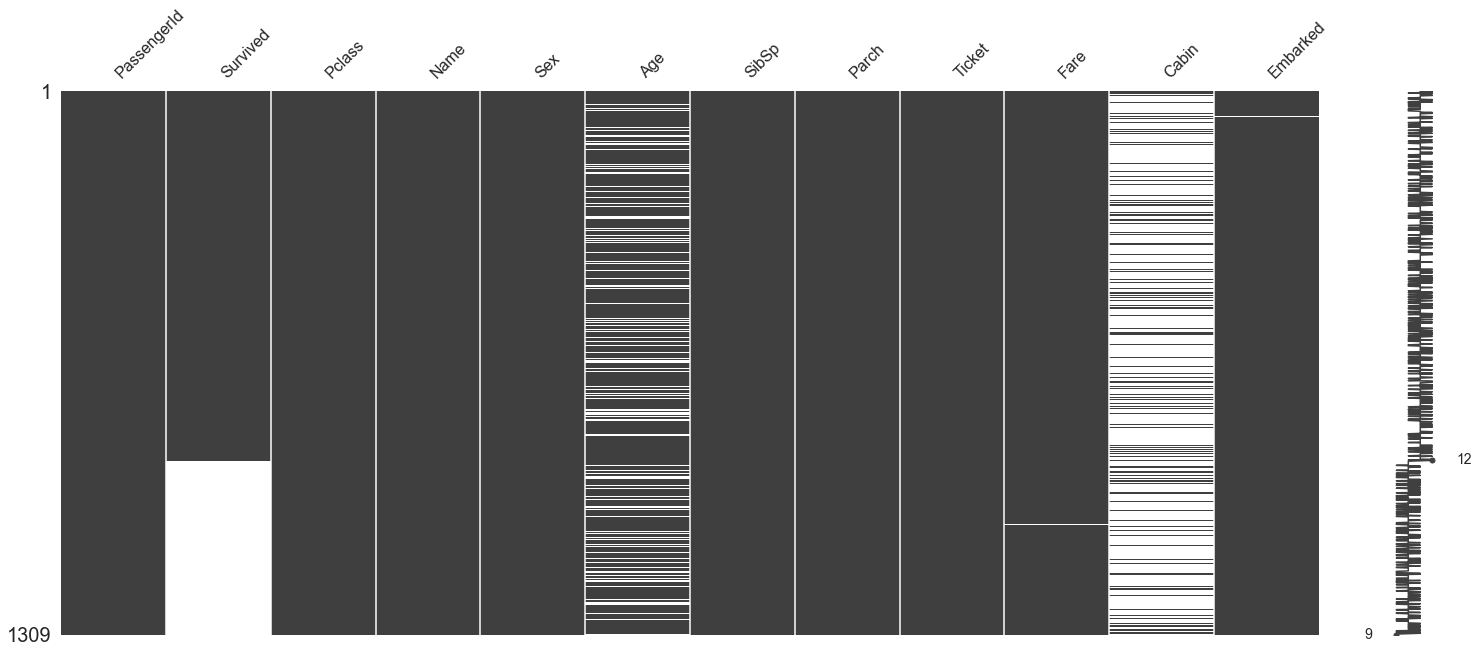

In [7]:
import missingno as msno
msno.matrix(pd.concat([data1,data_val]))

In the viz above we can see all features that came with the original data, the white lines indicate missing values, as we can see the Cabin column has high number of missing values, the age column has about 175 rows missing (we'll fill them below) and lastly the Fare and Embarked each has one missing value.


#### 3.1.1. Handle Embared, Fare and Cabin columns

<b>Embarked</b> - missing values were filled with the most freq. value which is 'S'<br>
<b>Fare</b> - since it's a number missing values were filled with median.<br>
<b>Cabin</b> - more than 75% of this column is missing, and the rest have duplicates so we decided to drop it.

In [8]:
for dataset in data_cleaner:
    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

#### 3.1.2. Handle SibSp, Parch, Name and Fare

Here we create new features <br>
<b>Family Size</b> - Which has the sum of SibSp and Parch columns which means it includes number of siblings, spouses, children and parents.<br>
<b>IsAlone</b> - indicates weather the passenger is traveling alone or with family, can be one of two 0-Alone, 1-Not alone.<br>
<b>Title</b> - taken from the passangers name this can be one of: Mr, Miss , Mrs, Master, Misc.<br>
<b>FareBin</b> - since fare is a continuous variable we decided to turn it into bins using qcut.

In [9]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
print('titles freq.')
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

titles freq.
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


#### 3.1.3 Handle Age

As we've seen above the age column has a few nulls, to fill them up correctly we've decided to build and train a random forest regressor on the rows with age, then use the model to predict the age on rows with null values. 

The used features are: 
1. Pclass
2. Sex
3. SibSp
4. FareBin
5. Title
6. IsAlone
7. FamilySize
8. Embarked

We used label encoder to encode some of those features since they're strings: Sex, title, farebin and embarked.

After we've filled the missing values we create an <b>AgeBin</b>.

In [10]:
# notice that instead of using Title, we should use its corresponding dummy variables 
label = LabelEncoder()
for dataset in data_cleaner:
    df_sub1 = dataset[['Age','Pclass','Sex','SibSp','FareBin','Title','IsAlone','FamilySize','Embarked']]
    for col in ['Sex','Title','FareBin','Embarked'] :
        df_sub1[col] = label.fit_transform(df_sub1[col])

    X_train  = df_sub1.dropna().drop('Age', axis=1)
    y_train  = dataset['Age'].dropna()
    X_test = df_sub1.loc[np.isnan(dataset.Age)].drop('Age', axis=1)

    regressor = RandomForestRegressor(n_estimators = 300)
    regressor.fit(X_train, y_train)
    y_pred = np.round(regressor.predict(X_test),1)
    dataset.Age.loc[dataset.Age.isnull()] = y_pred

    dataset.Age.isnull().sum(axis=0) # no more NAN now
    
#Create AgeBin
for dataset in data_cleaner:    
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

### 3.2. Create Final Data for Models

In [11]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [12]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rommetvedt, Mr. Knud Paust",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [13]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [14]:
train1_x.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [15]:
train1_x_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
105,3,0,0,28.0,7.8958,1,1,0,1,0,0,1,0,0,0,1,0
68,3,4,2,17.0,7.9250,7,0,1,0,0,0,1,0,0,1,0,0
253,3,1,0,30.0,16.1000,2,0,0,1,0,0,1,0,0,0,1,0
320,3,0,0,22.0,7.2500,1,1,0,1,0,0,1,0,0,0,1,0
706,2,0,0,45.0,13.5000,1,1,1,0,0,0,1,0,0,0,0,1


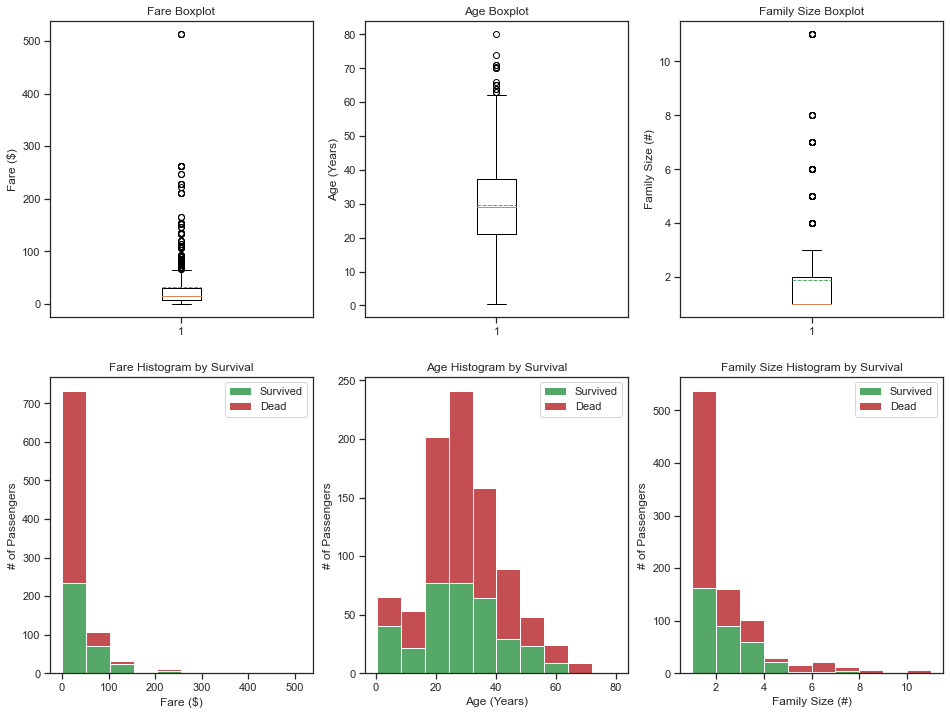

In [16]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<hr>

# 4. Machine Learning Algorithms <a class="anchor" id="ml-header"></a>

In this section we will build the following models, each will use the same features above to predict the survival or death of people on the Titanic:
1. Random Forest Classifier.
2. Support Vector Machine. 
3. AdaBoost Classifier.
4. K Nearest Neighbors Classifier.
5. XGB Classifier.
6. Sequential Neural Networks.

The last thing is PCA, we'll use it as a visualization before we start fitting the models.

### 4.1. PCA Visualization

In [ ]:
train1_x

In [19]:
from sklearn.decomposition import PCA as sklearnPCA

xy = sklearnPCA(n_components=2).fit_transform(train1_x)
xyz = sklearnPCA(n_components=3).fit_transform(train1_x)

#Save in dataframes
threeD = pd.DataFrame(xyz)
pca_df = pd.DataFrame(xy)

In [20]:
# Plot the data on a graph to see the nodes before and after clustering. 
fig =  plotly.subplots.make_subplots(rows=1, cols=2, horizontal_spacing=0.03, specs=[[{"type": "xy"},{"type": "scatter3d"}]])
fig.add_trace(
    go.Scatter( x=pca_df[0], y=pca_df[1],marker_symbol='hexagon2', mode="markers+text", 
               marker=dict(size=12,color='rgba(135, 206, 250, 0.7)', line=dict(width=1, color='DarkSlateGrey'))),
    row=1, col=1)
fig.add_trace(
    go.Scatter3d(x=threeD[0], y=threeD[1], z=threeD[2], 
                 mode="markers",marker_symbol='circle-open', marker=dict(size=7)),
    row=1, col=2)
fig.update_xaxes(title_text="x", row=1, col=1)
fig.update_yaxes(title_text="y", row=1, col=1)
fig.update_layout(height=600, width=1000,
                  title_text="Plotting data after lowering the it's dimention, once in 2D the other 3D", showlegend=False)
fig.show()

In [25]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # i. Ensemble Methods
    ensemble.RandomForestClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.AdaBoostClassifier( tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)),
    
    # ii. SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # iii. Nearest Neighbor
    neighbors.KNeighborsClassifier(),
     XGBClassifier()   
    ]

In [26]:
data1[Target]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Cross Validation On Sickit Learn Models  

In [27]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = data1[Target]
MLA_predict_test =  pd.DataFrame()
#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    
#     #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    

#     #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    row_index+=1

    

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare



,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
7,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.888577,0.828358,0.0403897
4,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834457,0.826866,0.0296006
3,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835581,0.826493,0.028528
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.893071,0.821642,0.130513
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.889326,0.81903,0.0191489
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_...",0.893071,0.810448,0.0692168
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.847004,0.804104,0.0072782
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.801124,0.796269,0.0200437


In [22]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
# train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
# train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
# train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)
train1_x_dummy.shape

(668, 17)

Text(0, 0.5, 'Algorithm')

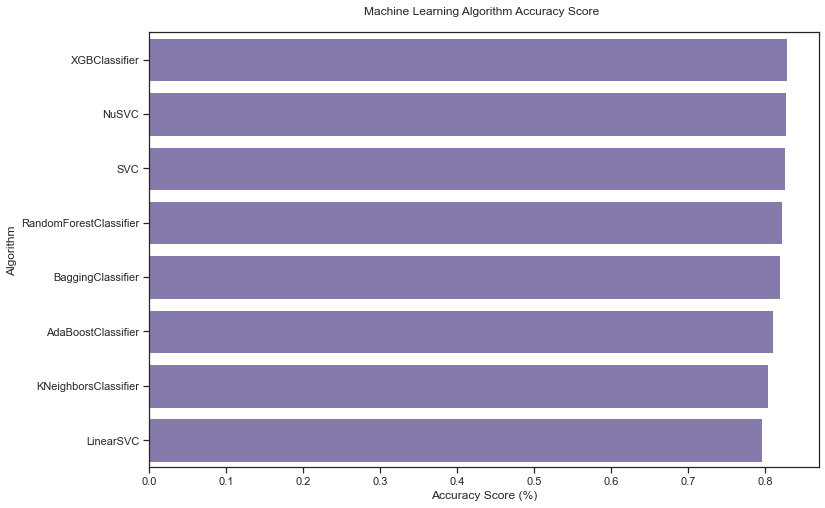

In [28]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [29]:
model = Sequential()
model.add(Dense(activation="relu", input_dim=7, units=11, kernel_initializer="uniform"))
# model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
         loss='binary_crossentropy',
         metrics=['accuracy'])


In [30]:
from datetime import datetime
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:




model.fit(train1_x_bin, train1_y_bin, batch_size = 10, epochs = 100,validation_split=0.1,verbose = 1,shuffle=True
#           ,callbacks=[tensorboard_callback]
         )


Epoch 1/100
61/61 [==============================] - 0s 6ms/step - loss: 0.6461 - accuracy: 0.6306 - val_loss: 0.6920 - val_accuracy: 0.4627
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.6473 - val_loss: 0.6808 - val_accuracy: 0.5075
Epoch 3/100
61/61 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7371 - val_loss: 0.6434 - val_accuracy: 0.5970
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7521 - val_loss: 0.5713 - val_accuracy: 0.6866
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7870 - val_loss: 0.5204 - val_accuracy: 0.7612
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7820 - val_loss: 0.5813 - val_accuracy: 0.7164
Epoch 7/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.8020 - val_loss: 0.5023 - val_accuracy: 0.7612
Epoch 8/100
6

Epoch 59/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8353 - val_loss: 0.4320 - val_accuracy: 0.8507
Epoch 60/100
61/61 [==============================] - 0s 3ms/step - loss: 0.4046 - accuracy: 0.8303 - val_loss: 0.4484 - val_accuracy: 0.8060
Epoch 61/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8369 - val_loss: 0.4253 - val_accuracy: 0.8806
Epoch 62/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3994 - accuracy: 0.8419 - val_loss: 0.4302 - val_accuracy: 0.8507
Epoch 63/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8353 - val_loss: 0.4167 - val_accuracy: 0.8806
Epoch 64/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3966 - accuracy: 0.8319 - val_loss: 0.4196 - val_accuracy: 0.8806
Epoch 65/100
61/61 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8353 - val_loss: 0.5350 - val_accuracy: 0.7761
Epoch 

In [32]:
y_pred=(model.predict(test1_x_bin) > 0.5).astype("int32")
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8295964125560538


In [33]:
results = model.evaluate(test1_x_bin, test1_y_bin, batch_size=10)

23/23 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8296


# Optimization:
## performed using sk_learn Grid Search Cross validation 

In [36]:




#RandomForestClassifier

MLA[0]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gridF = model_selection.GridSearchCV(MLA[0], random_grid, cv = 3, verbose = 1, 
                      n_jobs = 2)

bestF = gridF.fit(train1_x_bin, np.ravel(train1_y_bin,order='C'))
y_pred=bestF.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))



Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   18.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   38.4s
[Parallel(n_jobs=2)]: Done 1100 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 2000 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 3100 tasks      | elapsed:  4.1min
[Parallel(n_jobs=2)]: Done 4400 tasks      | elapsed:  5.8min
[Parallel(n_jobs=2)]: Done 5900 tasks      | elapsed:  7.8min
[Parallel(n_jobs=2)]: Done 7600 tasks      | elapsed:  9.7min
[Parallel(n_jobs=2)]: Done 9500 tasks      | elapsed: 11.7min
[Parallel(n_jobs=2)]: Done 11600 tasks      | elapsed: 13.8min


0.8385650224215246


[Parallel(n_jobs=2)]: Done 12960 out of 12960 | elapsed: 15.2min finished


In [37]:
MLA[0]= bestF 

In [38]:
bestF.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 100}

In [39]:
MLA[1]


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [40]:
#BaggingClassifier
MLA[1]

param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

gridF = model_selection.GridSearchCV(ensemble.BaggingClassifier(tree.DecisionTreeClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid)

bestB = gridF.fit(train1_x_bin, train1_y_bin)
y_pred=bestB.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))



0.8161434977578476


In [41]:
MLA[1] = bestB
bestB.best_params_

{'base_estimator__max_depth': 5, 'max_samples': 0.5}

In [42]:
MLA[2] =  ensemble.AdaBoostClassifier( tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None))

In [43]:
# AdaBoostClassifier
MLA[2]
# param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
# #               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [1, 2]
#              }

# gridF = model_selection.GridSearchCV(MLA[2], param_grid, cv = 3, verbose = 1, 
#                       n_jobs = -1)

# bestADA = gridF.fit(train1_x, train1_y)
# y_pred=bestADA.predict(test1_x)
# print(metrics.accuracy_score(test1_y, y_pred))

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [100,200,250,300]
             }


DTC = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

ABC = ensemble.AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = model_selection.GridSearchCV(MLA[2], param_grid=param_grid, scoring = 'roc_auc')
bestADA = grid_search_ABC.fit(train1_x_bin, train1_y_bin)
y_pred=bestADA.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))


0.8430493273542601


In [44]:
MLA[2] = bestADA
bestADA.best_params_


{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 100}

In [46]:
# SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}


grid_search_SVC =  model_selection.GridSearchCV(
        MLA[3] , param_grid)
bestSVC = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestADA.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8430493273542601


In [47]:
MLA[3] = bestSVC
bestSVC.best_params_

{'C': 1, 'gamma': 0.1}

In [48]:
# KNeighborsClassifier
MLA[6]
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
param_grid_knn = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors, 'p':p}
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[6] , param_grid_knn)
bestKNN = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestKNN.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))

0.8116591928251121


In [49]:
MLA[6] = bestKNN 
bestKNN.best_params_

{'leaf_size': 9, 'n_neighbors': 22, 'p': 1}

In [50]:
MLA[7]

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search_SVC =  model_selection.GridSearchCV(
        MLA[7] , params)
bestXGB = grid_search_SVC.fit(train1_x_bin, train1_y_bin)  
y_pred=bestXGB.predict(test1_x_bin)
print(metrics.accuracy_score(test1_y_bin, y_pred))


0.8161434977578476


In [51]:
MLA[7] = bestXGB 
bestXGB.best_params_

{'colsample_bytree': 0.8,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 1.0}

In [53]:
# save best estimator recived from GridSeatchCV method 

for  i in range(len(MLA)):
    if (MLA[i].__class__.__name__)   not in [ 'AdaBoostClassifier','NuSVC' ,'LinearSVC'] :
         if MLA[i].__class__.__name__ =='GridSearchCV' :
            print(MLA[i].__class__.__name__)
            MLA[i] = MLA[i].best_estimator_
            print(MLA[i])
        

GridSearchCV
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
GridSearchCV
BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_lea

In [54]:
# itirate over optimized Model and Save the Acc score 
MLA_columns = ['Optimized MLA Name',"Optimized Parameters",'Optimized MLA  Accuracy']
MLA_optimized_compare = pd.DataFrame(columns = MLA_columns)

# #index through MLA and save performance to table
row_index = 0
for alg in MLA:
    
    
#     #set name and parameters
    MLA_name = alg.__class__.__name__

    MLA_optimized_compare.loc[row_index, 'Optimized MLA Name'] = MLA_name
    MLA_optimized_compare.loc[row_index, 'Optimized Parameters'] = str(alg.get_params())
    y_pred=alg.predict(test1_x_bin)
    MLA_optimized_compare.loc[row_index, 'Optimized MLA  Accuracy'] =  metrics.accuracy_score(test1_y_bin, y_pred)
    print(metrics.accuracy_score(test1_y_bin, y_pred))
    row_index+=1
new_row = {'Optimized MLA Name':'Neural Net',
           'Optimized MLA  Accuracy':(metrics.accuracy_score(test1_y_bin, (model.predict(test1_x_bin) > 0.5).astype("int32"))),
           'Optimized Parameters': str(model) }
MLA_optimized_compare.sort_values(by = ['Optimized MLA  Accuracy'], ascending = False, inplace = True)
MLA_optimized_compare



0.8385650224215246
0.8161434977578476
0.8430493273542601
0.820627802690583
0.8251121076233184
0.7892376681614349
0.8116591928251121
0.8161434977578476


,Optimized MLA Name,Optimized Parameters,Optimized MLA Accuracy
2,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator__ccp_...",0.843049
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.838565
4,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.825112
3,SVC,"{'C': 1, 'break_ties': False, 'cache_size': 20...",0.820628
1,BaggingClassifier,"{'base_estimator__ccp_alpha': 0.0, 'base_estim...",0.816143
7,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.816143
6,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 9, 'metric'...",0.811659
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.789238


In [55]:
# add Neural Net to the List 
MLA_optimized_compare = MLA_optimized_compare.append(new_row, ignore_index=True)
MLA_optimized_compare.sort_values(by = ['Optimized MLA  Accuracy'], ascending = False, inplace = True)


Text(0, 0.5, 'Algorithm')

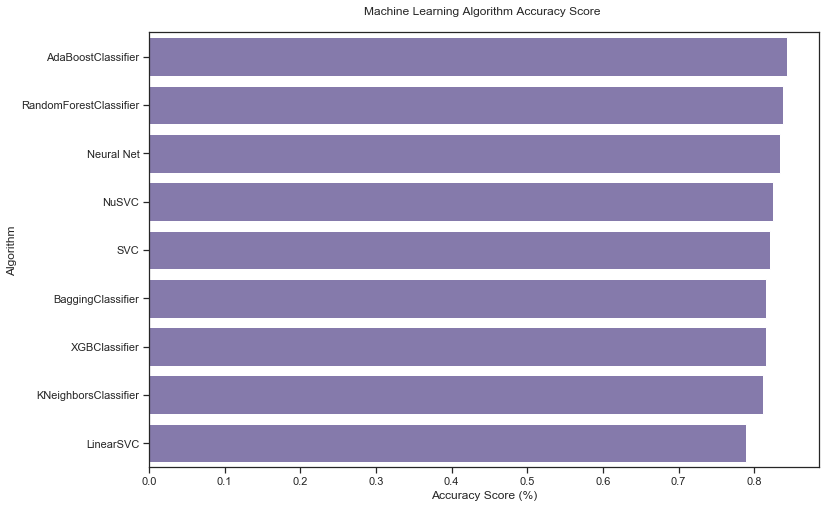

In [57]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='Optimized MLA  Accuracy', y = 'Optimized MLA Name', data = MLA_optimized_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')


In [58]:
MLA.append(model)

In [59]:
data_val[data1_x_bin]

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,1,3,1,5,1,2,0
1,0,3,2,6,2,3,0
2,1,2,1,5,1,4,1
3,1,3,2,5,1,1,1
4,0,3,2,6,3,1,1
...,...,...,...,...,...,...,...
413,1,3,2,5,1,1,1
414,0,1,0,1,1,2,3
415,1,3,2,5,1,2,0
416,1,3,2,5,1,1,1


In [60]:
(MLA[-1].predict(data_val[data1_x_bin]) > 0.5).astype("int32").reshape(-1)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
# Save precetion as CSV in order to submit Via Kaggle API 
for alg in MLA:
    result = pd.DataFrame()
    if(alg.__class__.__name__ == 'Sequential' ):
        result['Survived'] = (alg.predict(data_val[data1_x_bin]) > 0.5).astype("int32").reshape(-1)
    else:
        result['Survived'] = alg.predict(data_val[data1_x_bin])
        
    result['PassengerId'] = data_val['PassengerId']

    result.to_csv('output/'+alg.__class__.__name__ +".csv",index=False)
    

